### Merge Data
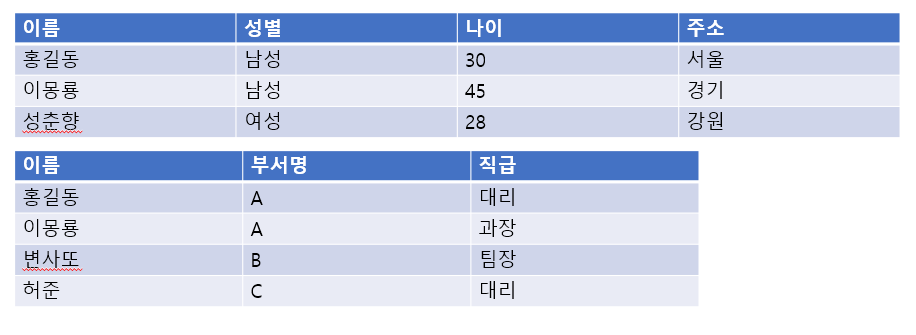

- 이름 col을 기준으로 병합하기
- 홍길동, 이몽룡, 성춘향 table을 왼쪽이라고 가정하자.

### Inner Join
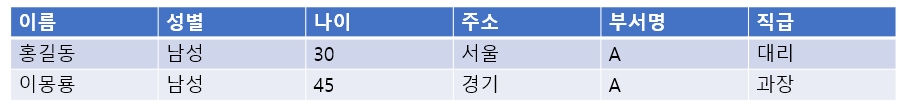

### Outer join
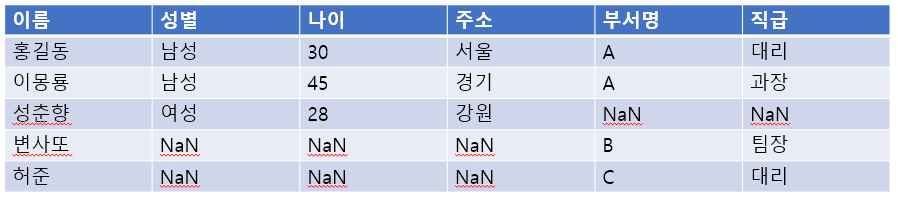

### Left Join
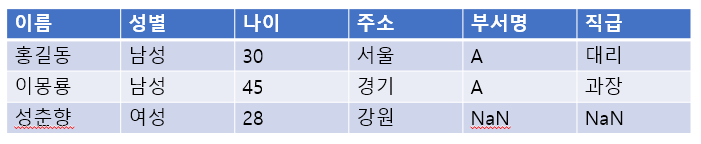

### Right Join
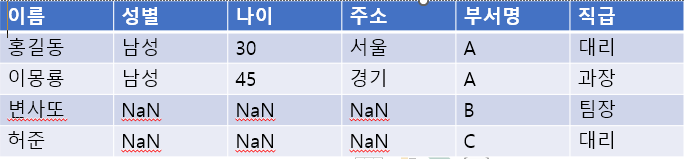

특정 열을 기준으로 서로 다른 df를 병합하는 방법
- 홍길동, 이몽룡 두 df에 있다. 두 df에 이름 col만 공통 col이다.
- col 이름을 기준으로 두 df를 병합해보자.


table 병합 방법 4가지
- Inner Join : 기준 col에서 공통된 data만 가져와서 붙이는 작업
> 홍길동, 이몽룡만 공통이다. 홍길동, 이몽룡 sample만 붙이기. (공통된 데이터만 붙이기)
- Outer Join: 기준 col에서, 모든 data를 가져와서 병합
> 모든 sample 가져와서 val 없는 건 NaN으로 붙이기

한쪽 table 기준으로 다른 한쪽 table을 붙이기
- Left 또는 Right Join
> 홍길동, 이몽룡, 성춘향 기준으로 data 병합 (left)

데이터 병합 방법(기법)
1. Inner Join: 두 df의 기준 col val 중 공통된 data만 병합한 df를 return
2. Outer Join: 기준 col의 모든 val of 두 df의 data를 병합한 df를 return
3. Left or Right Join : 둘 중 한 df를 기준으로, 그 df의 기준 col에 있는 val의 data만 병합한 df를 return

In [1]:
import pandas as pd

- pd.DataFrame.shape : 데이터의 전반을 파악하기 위해 데이터의 행 개수, 열 개수 확인하는 함수 사용

In [9]:
df1 = pd.read_csv("04_store_member.csv")
print(df1.shape)
df1.head()

(4396, 6)


,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0


In [8]:
df2 = pd.read_csv("04_store_product_1.csv")
print(df2.shape)
df2.head()

(130893, 11)


,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.0,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.0,99999999,매장1,NaN,2102
2,20170201,110104033,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000,매장1,NaN,2103
3,20170201,40203001,과실,견과,잣,잣(220g:1병),1.0,14800,매장1,NaN,2105
4,20170201,50417002,채소,뿌리채소,우엉,우엉(300g),1.0,3400,매장1,NaN,2105


df1
- col 6개이다.
df2 
- col 11개이다.

data 개수가 다르다.

### df2
회원 구매 이력 data
- one sample: 물품 1개 살 때마다 찍히는 자료 (because 회원번호 2102 두번)
> 똑같은 회원이 물품 2개 사면 2번 찍힌다.

### df1
회원 주소록 data
- one sample: 회원 한 명의 정보

In [13]:
# 회원 번호에 대해서, 구매금액의 총합, 구매 수량의 합을 계산해서 
# 회원 구매 이력 data에 붙여보자.

# 고객이 우리 매장에 와서
# 구매활동을 한 자료를 바탕으로
# 그 구매활동한 자료를
# 고객의 회원번호 별로 정리를 한 다음에
# 고객의 인적 사항과 결합해서
# 데이터를 분석해보자.

In [14]:
# 물품 판매 data(df2)에서 
# 회원번호별로 고객의 구매 특성을 뽑아내자.

- pivot_table : 특정 col을 return할 df의 index로 받는다.
> 따라서 회원번호를 index가 아닌 col로 빼줘야 병합할 떄 회원번호 col을 기준 col로 사용해줄 수 있다.

In [19]:
# 고객 1명이
# 우리 매장에 와서
# 총 얼마를 구매하고
# 총 몇개의 물품을 사갔는지가 한번에 정리된다.
df2.pivot_table(index="회원번호", values=["구매금액", "구매수량"], aggfunc="sum")

# pivot_table하면
# 회원번호가 index로 잡히고
# col이 구매금액과 구매수량의 합이 계산 되서 나온다.

,구매금액,구매수량
회원번호,,
2102,102093159,472.5
2103,7904400,1586.4
2104,389040,112.0
2105,3067930,602.0
2106,54550,25.0
...,...,...
6471,1600,1.0
6474,709400,175.0
6478,2600,1.0


In [17]:
# df1에는 4396명의 고객 주소록이 있다.
# 하지만 구매 data에는 1383명 밖에 없다.
# 따라서 적절한 병합기법을 택해서 적용해야 한다.

In [18]:
# 4396명 df1을 기준으로 붙이면, 결측값이 있더라도 1383개 구매금액, 구매수량 data가 와서 붙을거다.

In [ ]:
# 만약에 구매 특성이 확인된 고객만 분석을 하겠다고 하면
# 4396명 중 공통된 애들만 가져와서 붙이면
# 1383개의 data만 나와서 data를 붙일 수 있다. 

- df.reset_index() : index로 잡힌 회원번호가 return되는 df의 col로 튀어나왔다.
> pivot_table의 index를 col로 빼주는 방법

In [22]:
df2.pivot_table(index="회원번호", values=["구매금액", "구매수량"]).reset_index()

,회원번호,구매금액,구매수량
0,2102,249616.525672,1.155257
1,2103,5203.686636,1.044371
2,2104,5721.176471,1.647059
3,2105,5992.050781,1.175781
4,2106,3409.375000,1.562500
...,...,...,...
1378,6471,1600.000000,1.000000
1379,6474,4030.681818,0.994318
1380,6478,2600.000000,1.000000
1381,6489,3157.142857,2.000000


In [23]:
df3 = df2.pivot_table(index="회원번호", values=["구매금액", "구매수량"]).reset_index()

In [24]:
# 여기서 df3와 df1을 합치면
# 고객의 주소록과, 고객의 구매 특성을 병합한 df가 만들어진다.

pd.merge
- on : key column을 써준다
    > key col이란 내가 붙일 기준항목이다.

In [26]:
## Inner Join : 회원번호 기준으로


# 구매금액, 구매수량
# 데이터 1383개
pd.merge(df3, df1, on="회원번호", how="inner")

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2102,249616.525672,1.155257,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
1,2103,5203.686636,1.044371,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
2,2104,5721.176471,1.647059,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
3,2105,5992.050781,1.175781,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0
4,2106,3409.375000,1.562500,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.0
...,...,...,...,...,...,...,...,...
1378,6471,1600.000000,1.000000,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.0
1379,6474,4030.681818,0.994318,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.0
1380,6478,2600.000000,1.000000,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.0
1381,6489,3157.142857,2.000000,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.0


In [28]:
# df1이 right df이므로 df1 회원번호 기준으로 merge
# 4396개
# 원래 주소록에 있는 모든 data가 그대로 유지가 되면서 data가 병합됨
# 대신 구매금액, 구매수량 값이 없는 고객의 val에는 NaN이 들어감.
pd.merge(df3, df1, on="회원번호", how="right")

# right join 해서 쓰면 missing value가 너무 많기 때문에
# 어차피 missing value를 지우고 분석을 진행해야 하므로
# 앞으로 inner join으로 병합한 table을 사용하면 된다.

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2101,NaN,NaN,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,249616.525672,1.155257,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,5203.686636,1.044371,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,5721.176471,1.647059,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,5992.050781,1.175781,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0
...,...,...,...,...,...,...,...,...
4391,6492,NaN,NaN,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.0
4392,6493,NaN,NaN,정상회원,여,기혼,서울 관악구 행운동 1681,1982.0
4393,6494,NaN,NaN,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.0
4394,6495,NaN,NaN,정상회원,여,기혼,서울 용산구 한남동 737-,1961.0


In [ ]:
## Outer Join

### May 15

In [2]:
import pandas as pd

In [4]:
df1 = pd.read_csv("04_store_member.csv")
df2 = pd.read_csv("04_store_product_1.csv")

In [8]:
# 회원번호 1개, 구매물품 2개 이상이다. 
# 따라서 pivot table 합을 사용한다.
# 그리고 회원번호를 key col로 merge 한다.
df2.head(2)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.0,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.0,99999999,매장1,NaN,2102


In [10]:
# 회원번호가 index라 key col로 사용할 수 없다
df2.pivot_table(index="회원번호", values=["구매수량", "구매금액"], aggfunc="sum")

,구매금액,구매수량
회원번호,,
2102,102093159,472.5
2103,7904400,1586.4
2104,389040,112.0
2105,3067930,602.0
2106,54550,25.0
...,...,...
6471,1600,1.0
6474,709400,175.0
6478,2600,1.0


In [13]:
# 회원번호를 key col로 merge할 수 있다.
df3 = df2.pivot_table(index="회원번호", values=["구매수량", "구매금액"], aggfunc="sum").reset_index()

In [14]:
df3

,회원번호,구매금액,구매수량
0,2102,102093159,472.5
1,2103,7904400,1586.4
2,2104,389040,112.0
3,2105,3067930,602.0
4,2106,54550,25.0
...,...,...,...
1378,6471,1600,1.0
1379,6474,709400,175.0
1380,6478,2600,1.0
1381,6489,22100,14.0


In [15]:
## inner join: 1383 rows
pd.merge(df1, df3, on="회원번호", how="inner")

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액,구매수량
0,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0,102093159,472.5
1,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0,7904400,1586.4
2,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0,389040,112.0
3,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0,3067930,602.0
4,2106,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.0,54550,25.0
...,...,...,...,...,...,...,...,...
1378,6471,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.0,1600,1.0
1379,6474,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.0,709400,175.0
1380,6478,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.0,2600,1.0
1381,6489,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.0,22100,14.0


In [16]:
## outer join : 4396 rows
pd.merge(df1, df3, on="회원번호", how="outer")

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액,구매수량
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0,NaN,NaN
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0,102093159.0,472.5
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0,7904400.0,1586.4
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0,389040.0,112.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0,3067930.0,602.0
...,...,...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.0,NaN,NaN
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.0,NaN,NaN
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.0,NaN,NaN
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.0,NaN,NaN


In [18]:
# left join : 4396, null 값 4396 - 1383개 at 구매금액 and 구매수량? : T
pd.merge(df1, df3, on="회원번호", how="left").isnull().sum()

회원번호       0
회원상태       1
성별         3
결혼유무     947
주소         0
생년         3
구매금액    3013
구매수량    3013
dtype: int64

In [21]:
## right join : 1383, 구매금액 and 구매수량 null 값 0개? : T
pd.merge(df1, df3, on="회원번호", how="right").isnull().sum()

회원번호      0
회원상태      0
성별        1
결혼유무    288
주소        0
생년        2
구매금액      0
구매수량      0
dtype: int64

In [22]:
# 중복이 있으면 붙고, 없으면 안붙고
# pivot_table 하지 않고 바로 merge했을 때의 문제점
# : 성별, 연령 계산했을 때 중복되는 값이 나온다. 
# 한 품목 이상 구매한 고객이 있으므로.

# 세 가지 병합 방법 중, 가장 합리적인 방법은
# inner join이다. 그리고 inner join으로 붙인 table을
# 갖고 분석을 진행해줄 수 있다.

# 이와 같이, 상황과 데이터 구조, 데이터 타입에 맞는
# 적절한 데이터 병합 방법을 우리가 찾아서 사용해야 한다.

# 그냥 붙이면 중복되거나, 누락되는 일이 발생할 수 있다.

# pivot_table로 처리하고 붙일지,
# 바로 붙일지는 데이터를 확인해보면서
# 판단해야 한다.

In [23]:
df4 = pd.merge(df1, df3, on="회원번호", how="inner")

In [24]:
# 생년을 이용한 고객의 연령 계산: 현재 연도 - 고객의 생년
df4["연령"] = 2021 - df4["생년"]

In [26]:
# 고객의 인적 특성을 바탕으로 구매 특성을 분석해보자.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("font", family="Malgun Gothic") # Window 용 한글 font
# MAC : "Apple Gothic"

In [27]:
# 성별에 따른 구매수량과, 구매금액의 합
# 인원 수에 따른 구매력의 차이인지 알아보기: 여성 > 남성 (10배 차이)
df4["성별"].value_counts()

여    1270
남     112
Name: 성별, dtype: int64

In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회원번호    1383 non-null   int64  
 1   회원상태    1383 non-null   object 
 2   성별      1382 non-null   object 
 3   결혼유무    1095 non-null   object 
 4   주소      1383 non-null   object 
 5   생년      1381 non-null   float64
 6   구매금액    1383 non-null   int64  
 7   구매수량    1383 non-null   float64
 8   연령      1381 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 108.0+ KB


In [29]:
# 일단 pivot으로 계산해보기
# 인원 수가 10배 차이난다.
# 그로 인해 구매 금액, 구매수량 차이도 크다.
df4.pivot_table(index="성별", values=["구매금액", "구매수량"], aggfunc="sum")

,구매금액,구매수량
성별,,
남,36626115,7401.65
여,809091939,144515.65


<Axes: xlabel='성별', ylabel='구매금액'>

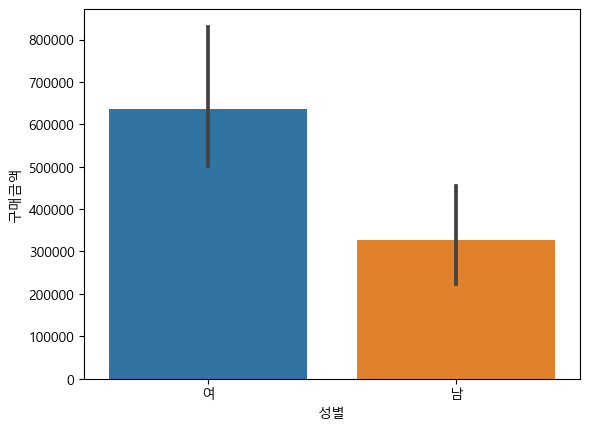

In [30]:
# 평균이 계산 된다. 
# 긴 막대기: confidence interval
# 이 data가 모집단에서 추출되었을 때,
# 모집단의 평균, 모평균이 있을 확률이 95%인 구간을
# 막대기로 표시해준 것이다.
sns.barplot(data=df4, x="성별", y="구매금액")

<Axes: xlabel='성별', ylabel='구매금액'>

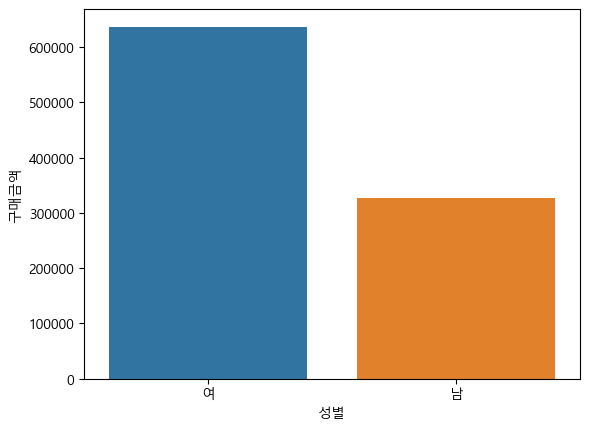

In [31]:
# errorbar = None : ci(confidence interval)신뢰구간 끄기
#  고객 당 구매 금액의 평균 계산
sns.barplot(data=df4, x="성별", y="구매금액", errorbar=None)

<Axes: xlabel='성별', ylabel='구매금액'>

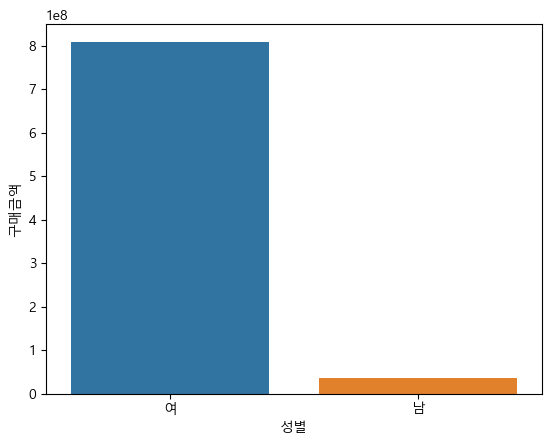

In [32]:
# 합 계산 : 인적특성(성별)과 구매 트렌드와의 관계
# estimator="sum": sum을 구하기
# 여성이 장을 보는 경우가 더 흔하기 때문에 당연한 결과(구매 금액 평균, 합 모두 여성이 더 높다.).
sns.barplot(data=df4, x="성별", y="구매금액", estimator="sum", errorbar=None)

In [33]:
#연령에 따른 구매금액, 구매수량 비교
pd.options.display.float_format = "{:.2f}".format
df4["연령"].describe()

count      1381.00
mean        -87.85
std        5327.94
min     -197916.00
25%          43.00
50%          50.00
75%          59.00
max        1828.00
Name: 연령, dtype: float64

In [34]:
cond1 = (df4["연령"] > 1) & (df4["연령"] < 100)
df4.loc[cond1][["연령"]].describe()

,연령
count,1375.00
mean,51.57
std,11.19
min,28.00
25%,43.00
50%,50.00
75%,59.00
max,94.00


<Axes: xlabel='연령', ylabel='구매수량'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


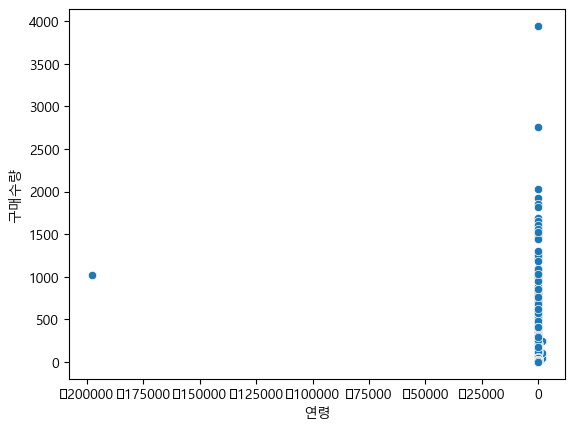

In [35]:
# sns.scatterplot: 숫자 데이터끼리 비교하는 시각화 기법
sns.scatterplot(data=df4, x="연령", y="구매수량")
# 연령에 음의 값이 있다: 이상치
# 이 이상치 때문에 데이터가 한쪽으로 쏠려있는 것처럼 보인다.

<Axes: xlabel='연령', ylabel='구매수량'>

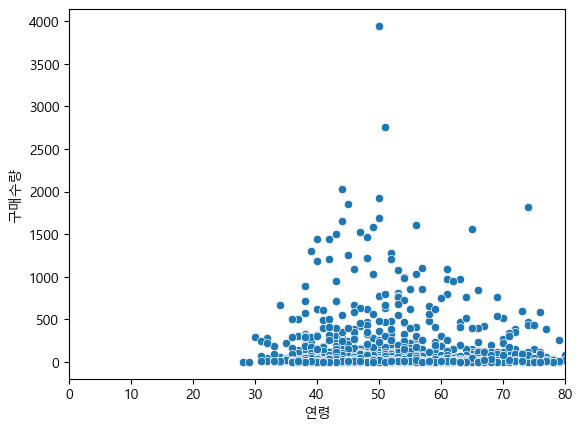

In [36]:
#plt.xlim : x의 limit
plt.xlim([0, 80]) # 0부터 80세까지만 보겠다.
sns.scatterplot(data=df4, x="연령", y="구매수량")

<Axes: xlabel='연령', ylabel='구매수량'>

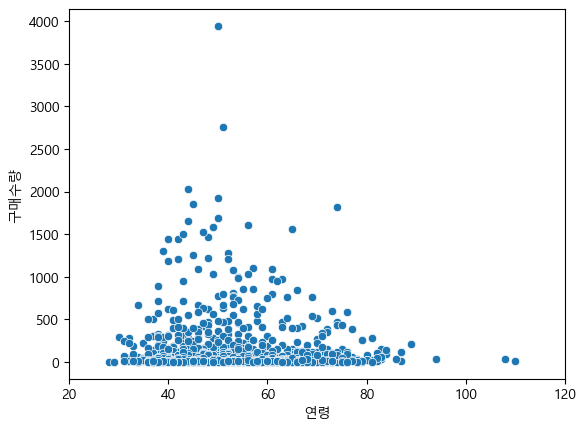

In [37]:
# 위 그림을 보니, 25세 이상부터이고
# 80세 이상도 있는 것처럼 보인다.
# plt.xlim을 조정해보자.
plt.xlim([20, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량")
# 이제 연령-구매수량 간의 관계를 볼 수 있다.
# 연령에 따라 구매수량이 증가하느냐?와 같은
# 특별한 추이는 없어보인다.

# 얼추 봤을 때,
# 40-50대 고객들 구매력이 좀 높구나까지 확인해볼 수 있다.

<Axes: xlabel='연령', ylabel='구매수량'>

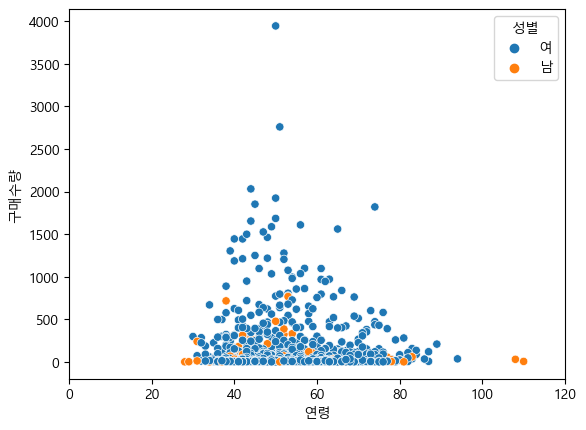

In [38]:
# 이거를 성별에 따라 나눠서 볼 수도 있다.
plt.xlim([0, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량", hue="성별")

In [39]:
# 이런 식으로 데이터를 병합하고
# 데이터를 시각화해서 분석작업까지
# 아주 간단하게 해봤따.

# 파생변수를 만드는 스킬,
# 통계적 가설 검정,
# 여러가지 전처리 기법, 분석 스킬을
# 좀 더 가미하면
# 더 다이나믹한 분석을 해볼 수 있다.